<a href="https://colab.research.google.com/github/rlackdrhkd/Do-it-deep-learning/blob/main/Do_it_%EB%94%A5%EB%9F%AC%EB%8B%9D_5%EC%9E%A5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn.datasets import load_breast_cancer     #training and testing model of logistic regression
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
x = cancer.data
y = cancer.target
x_train_all, x_test, y_train_all, y_test = train_test_split(x,y,stratify=y,
                                                            test_size=0.2, random_state=42)

In [3]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss="log", random_state=42)
sgd.fit(x_train_all,y_train_all)
sgd.score(x_test,y_test)

0.8333333333333334

In [4]:
from sklearn.linear_model import SGDClassifier #training and testing to support vector mechine
sgd = SGDClassifier(loss='hinge',random_state=42)
sgd.fit(x_train_all,y_train_all)
sgd.score(x_test,y_test)

0.9385964912280702

In [5]:
from sklearn.datasets import load_breast_cancer   #ready data set
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
x = cancer.data
y = cancer.target
x_train_all, x_test, y_train_all, y_test = train_test_split(x,y,stratify=y,
                                                            test_size=0.2, random_state=42)

In [6]:
x_train,x_val,y_train,y_val = train_test_split(x_train_all,y_train_all,
                                               stratify=y_train_all, test_size=0.2, random_state=42)  #split up verification set
print(len(x_train),len(x_val))

364 91


In [7]:
sgd = SGDClassifier(loss='log',random_state=42)
sgd.fit(x_train,y_train)
sgd.score(x_val,y_val)

0.6923076923076923

['mean perimeter' 'mean area']


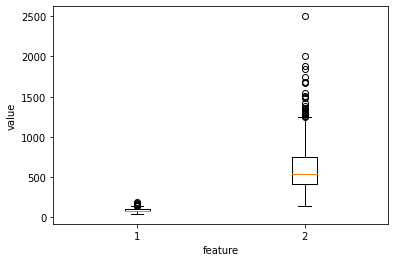

In [8]:
print(cancer.feature_names[[2,3]]) # compare prepared test data 
plt.boxplot(x_train[:,2:4])
plt.xlabel('feature')
plt.ylabel('value')
plt.show()

In [9]:
def __init__(self, learning_rate=0.1): #Add learing rate parameter and variable to record weight
  self.w = None
  self.b = None
  self.losses = []
  self.w_history = []
  self.lr = learning_rate

In [10]:
class SingleLayer:

  def __init__(self, learning_rate=0.1): #Add learing rate parameter and variable to record weight
    self.w = None
    self.b = None
    self.losses = []
    self.w_history = []
    self.lr = learning_rate

  def forpass(self,x):  # Calculation Straight line
    z = np.sum(x*self.w) + self.b
    return z

  def backprop(self, x, err):
    w_grad = x*err      # Calculation gradient about weight
    b_grad = 1*err      # Calculation gradient about intercept    
    return w_grad, b_grad
  
  def add_bias(self, x): #Adds a column vector filled with 1 at the beginning of the matrix
    return np.c_[np.ones((x.shape[0],1)),x]

  def activation(self,z): #Calculation sigmoid
    a = 1 / (1+ np.exp(-z))
    return a

  def fit(self,x,y,epochs=100):      #Record weight and controll update volume
    self.w = np.ones(x.shape[1])     #resets weight
    self.b = 0                       #resets intercept
    self.w_history.append(self.w.copy())   #record weight
    np.random.seed(42)                     #Desingate randomly seed
    for i in range(epochs):
      loss=0
      indexes = np.random.permutation(np.arange(len(x)))
      for i in indexes:
        z = self.forpass(x[i])
        a = self.activation(z)
        err = -(y[i] - a)
        w_grad, b_grad = self.backprop(x[i],err)
        self.w -= self.lr * w_grad
        self.b -= b_grad
        self.w_history.append(self.w.copy())
        a = np.clip(a,1e-10, 1-1e-10)
        loss += -(y[i]*np.log(a)+(1-y[i])*np.log(1-a))
        self.losses.append(loss/len(y))

  def predict(self,x):
    z = [self.forpass(x_i) for x_i in x] #forpass calculation
    return np.array(z) > 0               #apply stair function

  def score(self,x,y):
    return np.mean(self.predict(x) == y)

In [11]:
layer1 = SingleLayer()
layer1.fit(x_train,y_train)
layer1.score(x_val,y_val)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: overflow encountered in exp


0.9120879120879121

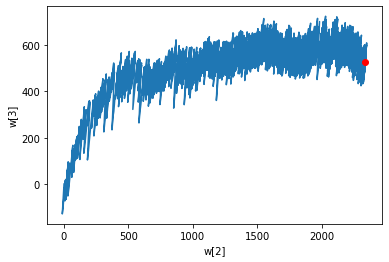

In [12]:
w2 = []
w3 = []
for w in layer1.w_history:
  w2.append(w[2])
  w3.append(w[3])
plt.plot(w2,w3)
plt.plot(w2[-1],w3[-1],'ro')
plt.xlabel('w[2]')
plt.ylabel('w[3]')
plt.show()

In [13]:
train_mean = np.mean(x_train, axis=0)
train_std = np.std(x_train, axis=0)
x_train_scaled = (x_train - train_mean) / train_std

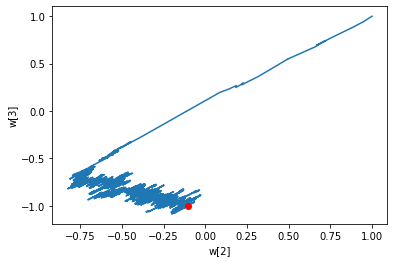

In [14]:
layer2 = SingleLayer()
layer2.fit(x_train_scaled, y_train)
w2 = []
w3 = []
for w in layer2.w_history:
  w2.append(w[2])
  w3.append(w[3])
plt.plot(w2,w3)
plt.plot(w2[-1],w3[-1],'ro')
plt.xlabel('w[2]')
plt.ylabel('w[3]')
plt.show()

In [15]:
layer2.score(x_val,y_val)

0.37362637362637363

In [16]:
val_mean = np.mean(x_val, axis=0)
val_std = np.std(x_val, axis=0)
x_val_scaled = (x_val - val_mean) / (val_std)
layer2.score(x_val_scaled, y_val)

0.967032967032967

<function matplotlib.pyplot.show(*args, **kw)>

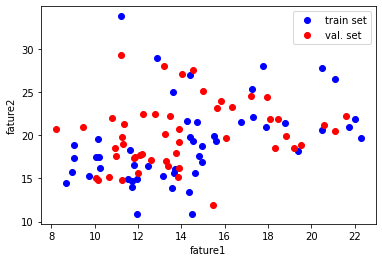

In [17]:
plt.plot(x_train[:50,0],x_train[:50,1],'bo')
plt.plot(x_val[:50,0],x_val[:50,1],'ro')
plt.xlabel('fature1')
plt.ylabel('fature2')
plt.legend(['train set', 'val. set'])
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

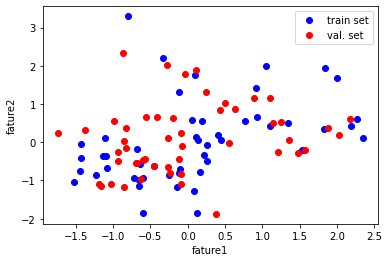

In [18]:
plt.plot(x_train_scaled[:50,0],x_train_scaled[:50,1],'bo')
plt.plot(x_val_scaled[:50,0],x_val_scaled[:50,1],'ro')
plt.xlabel('fature1')
plt.ylabel('fature2')
plt.legend(['train set', 'val. set'])
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

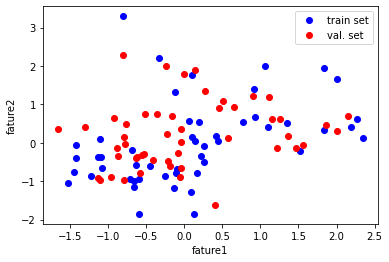

In [19]:
x_val_scaled = (x_val - train_mean) / train_std
plt.plot(x_train_scaled[:50,0],x_train_scaled[:50,1],'bo')
plt.plot(x_val_scaled[:50,0],x_val_scaled[:50,1],'ro')
plt.xlabel('fature1')
plt.ylabel('fature2')
plt.legend(['train set', 'val. set'])
plt.show

In [20]:
layer2.score(x_val_scaled,y_val)

0.967032967032967

In [21]:
class SingleLayer:

  def __init__(self, learning_rate=0.1): #Add learing rate parameter and variable to record weight
    self.w = None
    self.b = None
    self.losses = []
    self.val_losses= []
    self.w_history = []
    self.lr = learning_rate

  def forpass(self,x):  # Calculation Straight line
    z = np.sum(x*self.w) + self.b
    return z

  def backprop(self, x, err):
    w_grad = x*err      # Calculation gradient about weight
    b_grad = 1*err      # Calculation gradient about intercept    
    return w_grad, b_grad
  
  def add_bias(self, x): #Adds a column vector filled with 1 at the beginning of the matrix
    return np.c_[np.ones((x.shape[0],1)),x]

  def activation(self,z): #Calculation sigmoid
    a = 1 / (1+ np.exp(-z))
    return a

  def update_val_loss(self,x_val,y_val):
    if x_val is None:
      return 
    val_loss = 0
    for i in range(len(x_val)):
      z = self.forpass(x_val[i])
      a = self.activation(z)
      a = np.clip(a,1e-10,1-1e-10)
      val_loss += -(y_val[i]*np.log(a)+(1-y_val[i])*np.log(1-a))
    self.val_losses.append(val_loss/len(y_val))

  def fit(self,x,y,epochs=100,x_val=None,y_val=None):      #Record weight and controll update volume
    self.w = np.ones(x.shape[1])     #resets weight
    self.b = 0                       #resets intercept
    self.w_history.append(self.w.copy())   #record weight
    np.random.seed(42)                     #Desingate randomly seed
    for i in range(epochs):
      loss=0
      indexes = np.random.permutation(np.arange(len(x)))
      for i in indexes:
        z = self.forpass(x[i])
        a = self.activation(z)
        err = -(y[i] - a)
        w_grad, b_grad = self.backprop(x[i],err)
        self.w -= self.lr * w_grad
        self.b -= b_grad
        self.w_history.append(self.w.copy())
        a = np.clip(a,1e-10, 1-1e-10)
        loss += -(y[i]*np.log(a)+(1-y[i])*np.log(1-a))
      self.losses.append(loss/len(y))
      self.update_val_loss(x_val,y_val)

  def predict(self,x):
    z = [self.forpass(x_i) for x_i in x] #forpass calculation
    return np.array(z) > 0               #apply stair function

  def score(self,x,y):
    return np.mean(self.predict(x) == y)

In [22]:
layer3 = SingleLayer()
layer3.fit(x_train_scaled, y_train, x_val=x_val_scaled, y_val=y_val)

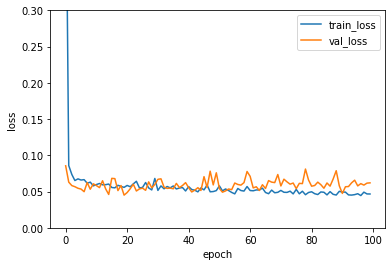

In [23]:
plt.ylim(0,0.3)
plt.plot(layer3.losses)
plt.plot(layer3.val_losses)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss','val_loss'])
plt.show()

In [24]:
layer4 = SingleLayer()
layer4.fit(x_train_scaled,y_train,epochs=20)
layer4.score(x_val_scaled,y_val)

0.978021978021978

**Apply L1 regularization to cancer data**

In [33]:
class SingleLayer:

  def __init__(self, learning_rate=0.1,l1=0 ,l2=0):
    self.w = None
    self.b = None
    self.losses = []
    self.val_losses = []
    self.w_histroy = []
    self.lr = learning_rate
    self.l1 = l1
    self.l2 = l2

  def forpass(self,x):  # Calculation Straight line
    z = np.sum(x*self.w) + self.b
    return z

  def backprop(self, x, err):
    w_grad = x*err      # Calculation gradient about weight
    b_grad = 1*err      # Calculation gradient about intercept    
    return w_grad, b_grad
  
  def add_bias(self, x): #Adds a column vector filled with 1 at the beginning of the matrix
    return np.c_[np.ones((x.shape[0],1)),x]

  def activation(self,z): #Calculation sigmoid
    a = 1 / (1+ np.exp(-z))
    return a

  def fit(self,x,y,epochs=100,x_val=None,y_val=None):
    self.w = np.ones(x.shape[1])    #reset weight
    self.b = 0                      #reset intercept
    self.w_histroy.append(self.w.copy())
    np.random.seed(42)
    for i in range(epochs):         #repeat as many times as epochs
      loss = 0
      indexes = np.random.permutation(np.arange(len(x))) #shuffle the indexes
      for i in indexes:
        z = self.forpass(x[i])
        a = self.activation(z)
        err = -(y[i] - a)
        w_grad, b_grad = self.backprop(x[i],err)
        w_grad += self.l1 * np.sign(self.w) + self.l2 * self.w
        self.w -= self.lr * w_grad
        self.b -= b_grad
        #Accumulate loss after cliping for a safe log calculation
        self.w_histroy.append(self.w.copy())
        a = np.clip(a,1e-10,1-1e-10)
        loss += -(y[i]*np.log(a)+(1-y[i])*np.log(1-a))
                #Save average loss each epoches
      self.losses.append(loss/len(y))
      self.update_val_loss(x_val,y_val)

  def reg_loss(self): #Add penarity function to logistic losses function
    return self.l1 * np.sum(np.abs(self.w)) + self.l2 / 2 * np.sum(self.w**2)

  def update_val_loss(self,x_val,y_val): #
    if x_val is None:
      return
    val_loss = 0
    for i in range(len(x_val)):
      z = self.forpass(x_val[i])
      a = self.activation(z)
      a = np.clip(a, 1e-10, 1-1e-10)
      val_loss += -(y_val[i]*np.log(a)+(1-y_val[i])*np.log(1-a))
    self.val_losses.append(val_loss/len(y_val) + self.reg_loss())

  def predict(self,x):
    z = [self.forpass(x_i) for x_i in x] #forpass calculation
    return np.array(z) > 0               #apply stair function

  def score(self,x,y):
    return np.mean(self.predict(x) == y)

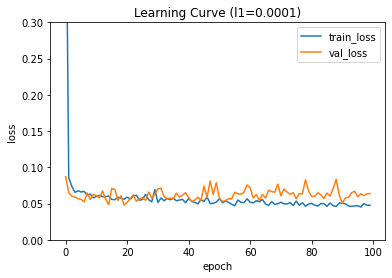

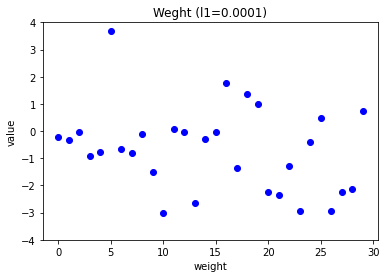

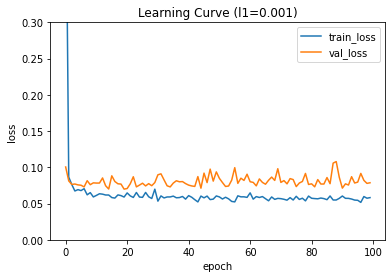

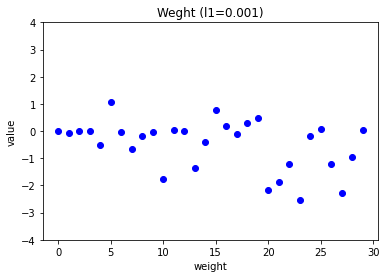

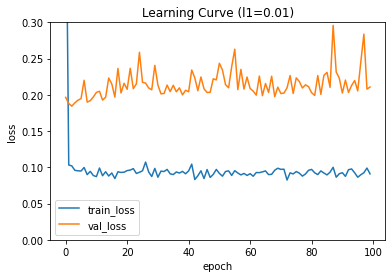

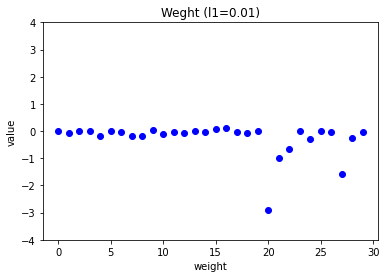

In [34]:
l1_list = [0.0001, 0.001, 0.01]

for l1 in l1_list:
  lyr = SingleLayer(l1=l1)
  lyr.fit(x_train_scaled, y_train, x_val=x_val_scaled, y_val=y_val)

  plt.plot(lyr.losses)
  plt.plot(lyr.val_losses)
  plt.title("Learning Curve (l1={})".format(l1))
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train_loss','val_loss'])
  plt.ylim(0,0.3)
  plt.show()

  plt.plot(lyr.w, 'bo')
  plt.title('Weght (l1={})'.format(l1))
  plt.ylabel('value')
  plt.xlabel('weight')
  plt.ylim(-4,4)
  plt.show()

In [36]:
layer5 = SingleLayer(l1=0.001)
layer5.fit(x_train_scaled, y_train, epochs=20)
layer5.score(x_val_scaled, y_val)

0.978021978021978

**Apply L2 regularization to cancer data**

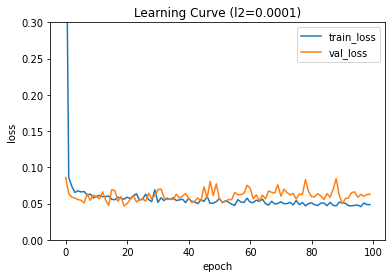

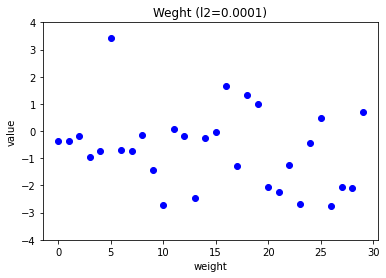

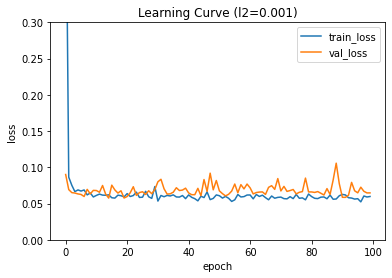

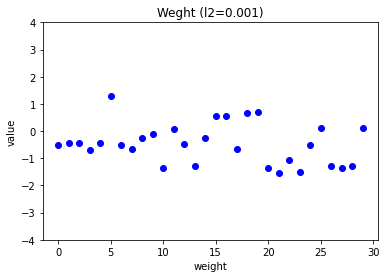

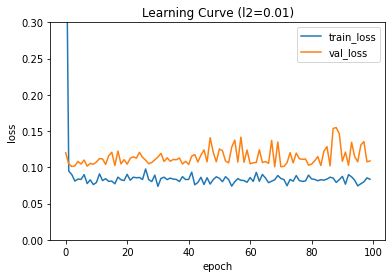

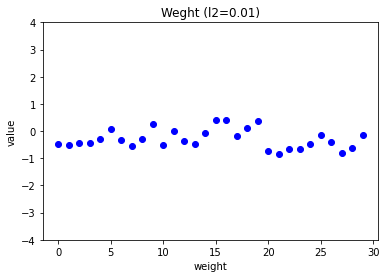

In [38]:
l2_list = [0.0001, 0.001, 0.01]

for l2 in l2_list:
  lyr = SingleLayer(l2=l2)
  lyr.fit(x_train_scaled, y_train, x_val=x_val_scaled, y_val=y_val)

  plt.plot(lyr.losses)
  plt.plot(lyr.val_losses)
  plt.title("Learning Curve (l2={})".format(l2))
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train_loss','val_loss'])
  plt.ylim(0,0.3)
  plt.show()

  plt.plot(lyr.w, 'bo')
  plt.title('Weght (l2={})'.format(l2))
  plt.ylabel('value')
  plt.xlabel('weight')
  plt.ylim(-4,4)
  plt.show()

In [39]:
layer6=SingleLayer(l2=0.01)
layer6.fit(x_train_scaled, y_train, epochs=50)
layer6.score(x_val_scaled, y_val)

0.978021978021978

In [41]:
np.sum(layer6.predict(x_val_scaled) == y_val)

89

**Using regularization from SGDClassifier**

In [42]:
sgd = SGDClassifier(loss='log',penalty='l2', alpha=0.001, random_state=42)
sgd.fit(x_train_scaled, y_train)
sgd.score(x_val_scaled, y_val)

0.978021978021978

**Learn Cross Validation and play**

In [50]:
validation_scores = []

In [52]:
k = 10
bins = len(x_train) // k

for i in range(k):
  start = i*bins
  end = (i+1)*bins
  val_fold = x_train_all[start:end]
  val_target = y_train_all[start:end]

  train_index = list(range(0,start)) + list(range(end,len(x_train)))
  train_fold = x_train_all[train_index]
  train_target = y_train_all[train_index]

  train_mean=np.mean(train_fold, axis = 0)
  train_std = np.std(train_fold, axis=0)
  train_fold_scaled = (train_fold - train_mean) / train_std
  val_fold_scaled = (val_fold - train_mean) / train_std

  lyr = SingleLayer(l2=0.01)
  lyr.fit(train_fold_scaled, train_target, epochs=50)
  score = lyr.score(val_fold_scaled, val_target)
  validation_scores.append(score)

print(np.mean(validation_scores))

0.9583333333333333


**Do cross validation from sklearn**

In [60]:
from sklearn.model_selection import cross_validate

sgd = SGDClassifier(loss='log',penalty='l2', alpha=0.001,random_state=42)
scores = cross_validate(sgd, x_train_all,y_train_all, cv=10)
print(np.mean(scores['test_score']))

0.850096618357488


**Using Pipeline**

In [63]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
pipe = make_pipeline(StandardScaler(),sgd)
scores = cross_validate(pipe,x_train_all,y_train_all,cv=10,return_train_score=True)
print(np.mean(scores['test_score']))

0.9694202898550724


In [64]:
print(np.mean(scores["train_score"]))

0.9875478561631581
